![Bikeshare Insights Header Image](bike_share_header.png)


# Bikeshare Insights: Summer in the Windy City 

This dataset contains information on Divvy Bikes, a bikeshare program that provides residents and visitors of Chicago with a convenient way to explore the city. 

The workspace is set up with one CSV file containing bikeshare activities at the peak of the summer-July 2023. Columns include ride ID, bike type, start and end times, station names and IDs, location coordinates, and member type. Feel free to make this workspace yours by adding and removing cells, or editing any of the existing cells.

[Source: Divvy Bikes](https://divvybikes.com/system-data)

### 🌎 **Some guiding questions to help you explore this data:**
1. How many observations are in the dataset? Are there null values? 
2. How would you clean and prepare the data for analysis?
3. Which bike types are popular and which ones aren't? Check if being a member or casual rider makes a difference in bike choice.
4. Time check! What are the peak and off-peak riding times during the day?

### 📊 **Visualization ideas**
- Bar chart: Display the number of times each bike type is used to identify the most and least used bikes.
- Grouped bar chart: Compare bike usage by member type (member vs. casual) to see if it affects bike choice.
- Heatmap: Vividly illustrate the popularity of bikes at different times during the day and week.

# Exploratory Analysis 🚵

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

divvy_jan2023 = pd.read_parquet("202307-divvy-tripdata.parquet")
divvy_jan2023.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member


In [3]:
# create a copy of the dataset

divvy = divvy_jan2023.copy()

In [4]:
# check the summary of the dataset

divvy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767650 entries, 0 to 767649
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             767650 non-null  object 
 1   rideable_type       767650 non-null  object 
 2   started_at          767650 non-null  object 
 3   ended_at            767650 non-null  object 
 4   start_station_name  644707 non-null  object 
 5   start_station_id    644707 non-null  object 
 6   end_station_name    637346 non-null  object 
 7   end_station_id      637346 non-null  object 
 8   start_lat           767650 non-null  float64
 9   start_lng           767650 non-null  float64
 10  end_lat             766396 non-null  float64
 11  end_lng             766396 non-null  float64
 12  member_casual       767650 non-null  object 
dtypes: float64(4), object(9)
memory usage: 76.1+ MB


Check for the null values count and how many percentage of each columns are null values

In [5]:
# Null values, Non-null values, % of Null values, Unique Count breakdown


def divvy_info():
    temp = pd.DataFrame(index = divvy.columns)
    temp['Datatype'] = divvy.dtypes
    temp['Not Null Values'] = divvy.count()
    temp['Null Values'] = divvy.isnull().sum()
    temp['Percentage of Null Values'] = (divvy.isnull().mean()) * 100
    temp["Unique Count"] = divvy.nunique()
    return temp
divvy_info()

,Datatype,Not Null Values,Null Values,Percentage of Null Values,Unique Count
ride_id,object,767650,0,0.000000,767650
rideable_type,object,767650,0,0.000000,3
started_at,object,767650,0,0.000000,617777
ended_at,object,767650,0,0.000000,619777
start_station_name,object,644707,122943,16.015502,1253
start_station_id,object,644707,122943,16.015502,1223
end_station_name,object,637346,130304,16.974402,1250
end_station_id,object,637346,130304,16.974402,1221
start_lat,float64,767650,0,0.000000,215596
start_lng,float64,767650,0,0.000000,210238


From this analysis, we can draw up of some observations.

- `start_station_name`, `start_station_id`, `end_station_name`, `end_station_id`, `end_lat`, `end_lng` have null values.

The null values available in these columns constitute a minute percentage of the total dataset, which indicates that the sample size is sufficient for analysis. Therefore the columns will be dropped.
 

- `start_at` and `ended_at` are in object datatype.

These columns need to be converted to the appropriate datatype.

In [6]:
# drop all null values

divvy = divvy.dropna(subset=['start_station_name', 'start_station_id', 'end_station_name','end_station_id', 'end_lat', 'end_lng'])

# confirm if the null values have been dropped

divvy.info()


<class 'pandas.core.frame.DataFrame'>
Index: 573958 entries, 0 to 767626
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             573958 non-null  object 
 1   rideable_type       573958 non-null  object 
 2   started_at          573958 non-null  object 
 3   ended_at            573958 non-null  object 
 4   start_station_name  573958 non-null  object 
 5   start_station_id    573958 non-null  object 
 6   end_station_name    573958 non-null  object 
 7   end_station_id      573958 non-null  object 
 8   start_lat           573958 non-null  float64
 9   start_lng           573958 non-null  float64
 10  end_lat             573958 non-null  float64
 11  end_lng             573958 non-null  float64
 12  member_casual       573958 non-null  object 
dtypes: float64(4), object(9)
memory usage: 61.3+ MB


In [7]:
# convert `start_at` and `end_at` column to datetime datatype

divvy['started_at'] = pd.to_datetime(divvy['started_at'])
divvy['ended_at'] = pd.to_datetime(divvy['ended_at'])

#confirm that the datatype has changed

divvy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573958 entries, 0 to 767626
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             573958 non-null  object        
 1   rideable_type       573958 non-null  object        
 2   started_at          573958 non-null  datetime64[ns]
 3   ended_at            573958 non-null  datetime64[ns]
 4   start_station_name  573958 non-null  object        
 5   start_station_id    573958 non-null  object        
 6   end_station_name    573958 non-null  object        
 7   end_station_id      573958 non-null  object        
 8   start_lat           573958 non-null  float64       
 9   start_lng           573958 non-null  float64       
 10  end_lat             573958 non-null  float64       
 11  end_lng             573958 non-null  float64       
 12  member_casual       573958 non-null  object        
dtypes: datetime64[ns](2), float64(4), 

In [8]:
# Check If the end date is earlier than start date
false_date = divvy.loc[divvy['started_at'] > divvy['ended_at']]

# (No. of rows with false date, No. of coloumns)
false_date

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
251240,09632A75482D0DEE,electric_bike,2023-07-30 01:21:48,2023-07-30 01:21:44,Lincoln Ave & Roscoe St*,chargingstx5,Lincoln Ave & Roscoe St*,chargingstx5,41.943326,-87.670737,41.943324,-87.670748,casual
354273,CE965D382AED6196,electric_bike,2023-07-20 12:54:28,2023-07-20 12:54:27,California Ave & Marquette Rd,390,California Ave & Marquette Rd,390,41.771597,-87.693339,41.771579,-87.693357,casual
724028,68912B520CB9541C,electric_bike,2023-07-20 11:04:45,2023-07-20 11:04:44,Public Rack - Milwaukee Ave & Higgins Ave,1121.0,Public Rack - Milwaukee Ave & Higgins Ave,1121.0,41.968576,-87.761332,41.968596,-87.761209,member


3 of the `started_at` column has earlier end date than start date which makes the data false. 

I will be dropping these rows.

In [9]:
# drop the 3 rows with false date

divvy = divvy[divvy['started_at'] <= divvy['ended_at']]

# confirm if the rows have been dropped

divvy.loc[divvy['started_at'] > divvy['ended_at']]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


We need to create columns to see the ridelength, weekday of the ride, hour of the ride.

In [10]:
# create ride_length column to know the total duration of the ride in minutes

divvy['ride_length(mins)'] =  ((divvy['ended_at'] - divvy['started_at']).dt.total_seconds() / 60).round(2)


# create the weekday column of the ride

divvy['weekday'] = divvy['started_at'].dt.day_name()

# create the hour column of the ride

divvy["started_hour"] = divvy["started_at"].dt.hour
divvy["ended_hour"] = divvy["ended_at"].dt.hour


divvy

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length(mins),weekday,started_hour,ended_hour
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,16.50,Sunday,20,20
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,13.50,Sunday,17,17
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,9.60,Sunday,10,10
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member,4.93,Friday,8,8
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,11.43,Saturday,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767338,3B228F52743C58B7,classic_bike,2023-07-21 13:13:48,2023-07-21 15:08:04,Western Ave & Roscoe St,15634,Western Ave & Roscoe St,15634,41.943034,-87.687288,41.943034,-87.687288,casual,114.27,Friday,13,15
767444,67BE62CFD9B1E3EA,electric_bike,2023-07-17 13:45:41,2023-07-17 13:45:43,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922667,-87.697114,41.922695,-87.697153,member,0.03,Monday,13,13
767535,E771BD59731AEC4D,electric_bike,2023-07-26 18:05:32,2023-07-26 18:18:23,Kenosha & Wellington,361,Kenosha & Wellington,361,41.934455,-87.733782,41.934442,-87.733780,member,12.85,Wednesday,18,18
767594,70B7A0759219DB7E,electric_bike,2023-07-13 13:38:44,2023-07-13 13:39:21,Kedzie Ave & Lake St,KA1504000106,Kedzie Ave & Lake St,KA1504000106,41.884788,-87.706334,41.884603,-87.706304,member,0.62,Thursday,13,13


We need to create a time_of_day column to group the Hour into the time of the day the ride was taken into (Morning, Afternoon, Evening and Night)

Using [Britanna Dictionary](https://www.britannica.com/dictionary/eb/qa/parts-of-the-day-early-morning-late-morning-etc) hour of the day reference to categorise the hour. 

Morning   - 5 am to 12 pm (noon) <br>
Afternoon - 12 pm to 5 pm <br>
Evening   - 5 pm to 9 pm <br>
Night     - 9 pm to 4 am 


In [11]:
daytime = [
    (divvy['started_hour'] >= 5) & (divvy['ended_hour'] <= 12),
    (divvy['started_hour'] >= 12) & (divvy['ended_hour'] <= 17),
    (divvy['started_hour'] >= 17) & (divvy['ended_hour'] <= 21),
    (divvy['started_hour'] >= 21) & (divvy['ended_hour'] <= 4)
]

times_of_the_day = ['Morning', 'Afternoon', 'Evening', 'Night']

divvy['time_of_day'] = np.select(daytime, times_of_the_day, default="Unknown")


divvy

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length(mins),weekday,started_hour,ended_hour,time_of_day
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,16.50,Sunday,20,20,Evening
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,13.50,Sunday,17,17,Afternoon
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,9.60,Sunday,10,10,Morning
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member,4.93,Friday,8,8,Morning
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,11.43,Saturday,15,15,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767338,3B228F52743C58B7,classic_bike,2023-07-21 13:13:48,2023-07-21 15:08:04,Western Ave & Roscoe St,15634,Western Ave & Roscoe St,15634,41.943034,-87.687288,41.943034,-87.687288,casual,114.27,Friday,13,15,Afternoon
767444,67BE62CFD9B1E3EA,electric_bike,2023-07-17 13:45:41,2023-07-17 13:45:43,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922667,-87.697114,41.922695,-87.697153,member,0.03,Monday,13,13,Afternoon
767535,E771BD59731AEC4D,electric_bike,2023-07-26 18:05:32,2023-07-26 18:18:23,Kenosha & Wellington,361,Kenosha & Wellington,361,41.934455,-87.733782,41.934442,-87.733780,member,12.85,Wednesday,18,18,Evening
767594,70B7A0759219DB7E,electric_bike,2023-07-13 13:38:44,2023-07-13 13:39:21,Kedzie Ave & Lake St,KA1504000106,Kedzie Ave & Lake St,KA1504000106,41.884788,-87.706334,41.884603,-87.706304,member,0.62,Thursday,13,13,Afternoon


## Questions🧩 and Visualization 📊

<strong>1. Which bikes are popular among users? </strong>

In [12]:
# most used bikes among users


rideable_type_counts = divvy['rideable_type'].value_counts()

rideable_type_counts

rideable_type
classic_bike     361464
electric_bike    194661
docked_bike       17830
Name: count, dtype: int64

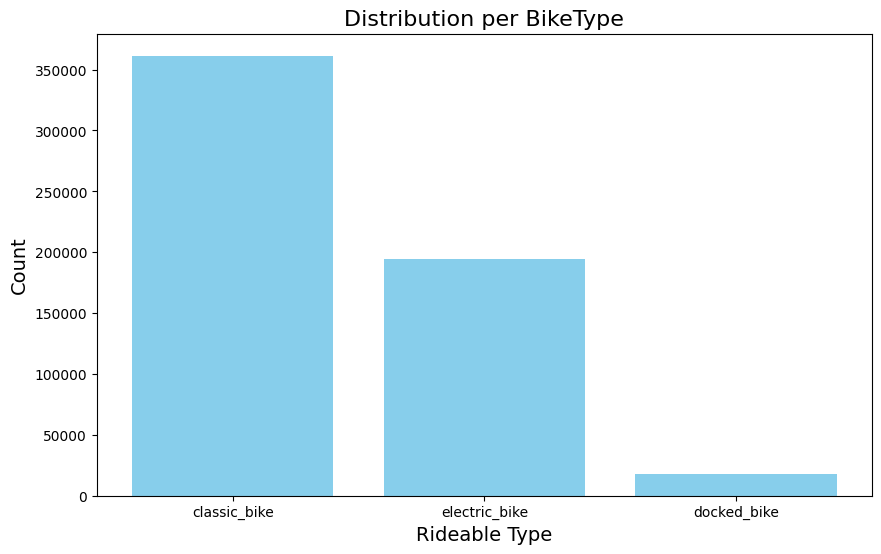

In [13]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(rideable_type_counts.index, rideable_type_counts.values, color='skyblue')

# Adding labels and title
plt.xlabel('Rideable Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution per BikeType', fontsize=16)
plt.show()

Classic bike is the most used bikes with 36,1464 bikes, followed by electric bikes with 194,661 bikes and docked bike with 17,830 bikes.

<strong> 2. Distribution of bike used by member_casual </strong>

In [14]:
divvy['member_casual'].value_counts()

member_casual
member    328663
casual    245292
Name: count, dtype: int64

In [18]:
divvy.groupby('member_casual')['rideable_type'].value_counts().unstack(fill_value=0)


rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,142363,17830,85099
member,219101,0,109562


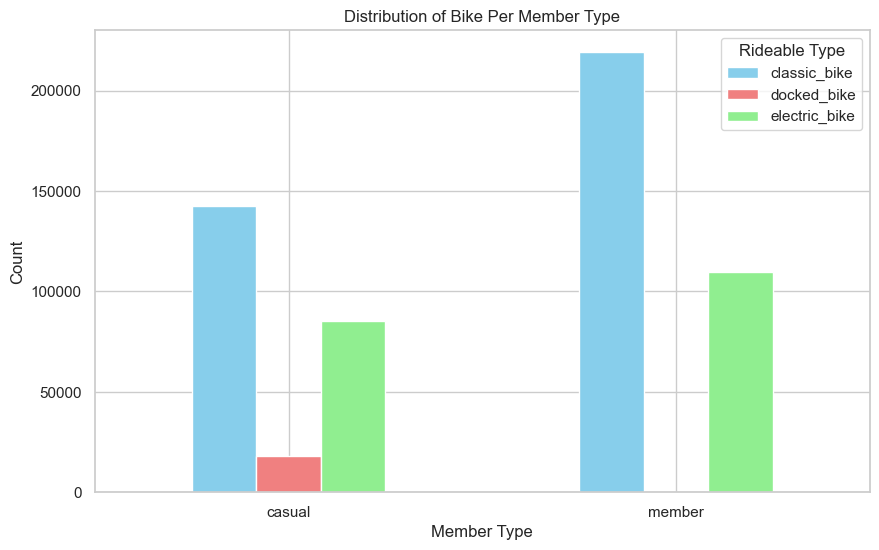

In [26]:
result = divvy.groupby('member_casual')['rideable_type'].value_counts().unstack(fill_value=0)


ax =result.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral', 'lightgreen'])

# Add labels and a title
plt.xlabel('Member Type')
plt.ylabel('Count')
plt.title('Distribution of Bike Per Member Type')

# Set the rotation of x-axis labels to 0 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Show the plot
plt.legend(title='Rideable Type')
plt.show()

There are more member type with classic and electric bikes although there are no docked bike except by casual member type.

<strong> 3. Top 10 start station and Top 10 end station </strong>

In [27]:
# Top 10 start stations
top_10_start_stations = divvy['start_station_name'].value_counts().head(10)

# Top 10 end stations
top_10_end_stations = divvy['end_station_name'].value_counts().head(10)

# Print the top 10 start and end stations
print("Top 10 Start Stations:")
print(top_10_start_stations)

print("\nTop 10 End Stations:")
print(top_10_end_stations)

Top 10 Start Stations:
start_station_name
Streeter Dr & Grand Ave               11222
DuSable Lake Shore Dr & North Blvd     6949
DuSable Lake Shore Dr & Monroe St      6806
Michigan Ave & Oak St                  6579
Theater on the Lake                    5706
Millennium Park                        4739
Clark St & Elm St                      4502
Wells St & Concord Ln                  4225
Montrose Harbor                        3932
Clark St & Lincoln Ave                 3822
Name: count, dtype: int64

Top 10 End Stations:
end_station_name
Streeter Dr & Grand Ave               11583
DuSable Lake Shore Dr & North Blvd     7936
Michigan Ave & Oak St                  6780
DuSable Lake Shore Dr & Monroe St      6713
Theater on the Lake                    5941
Millennium Park                        4847
Clark St & Elm St                      4317
Wells St & Concord Ln                  4306
Montrose Harbor                        4091
Clark St & Lincoln Ave                 3907
Name: count, 

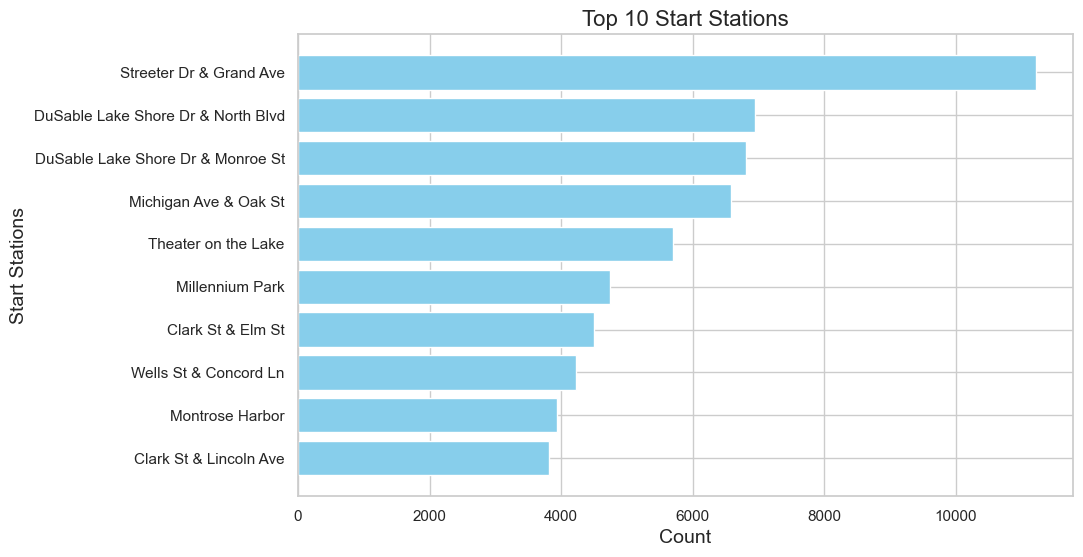

In [33]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_start_stations.index, top_10_start_stations.values, color='skyblue')

# Adding labels and title
plt.ylabel('Start Stations', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.title('Top 10 Start Stations', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

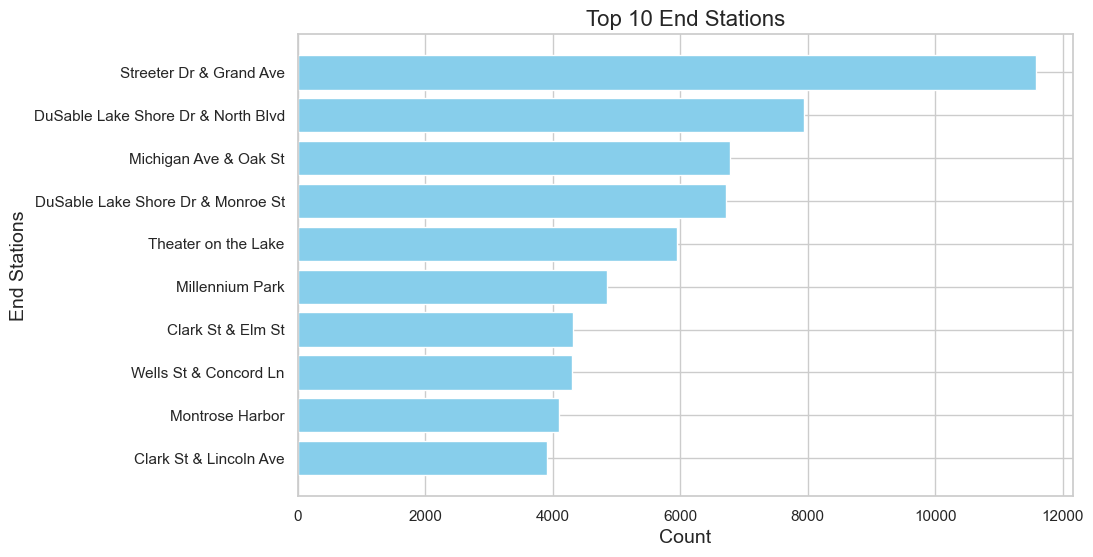

In [34]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_end_stations.index, top_10_end_stations.values, color='skyblue')

# Adding labels and title
plt.ylabel('End Stations', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.title('Top 10 End Stations', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

<strong>4. What is the distribution of Ride Length? </strong>

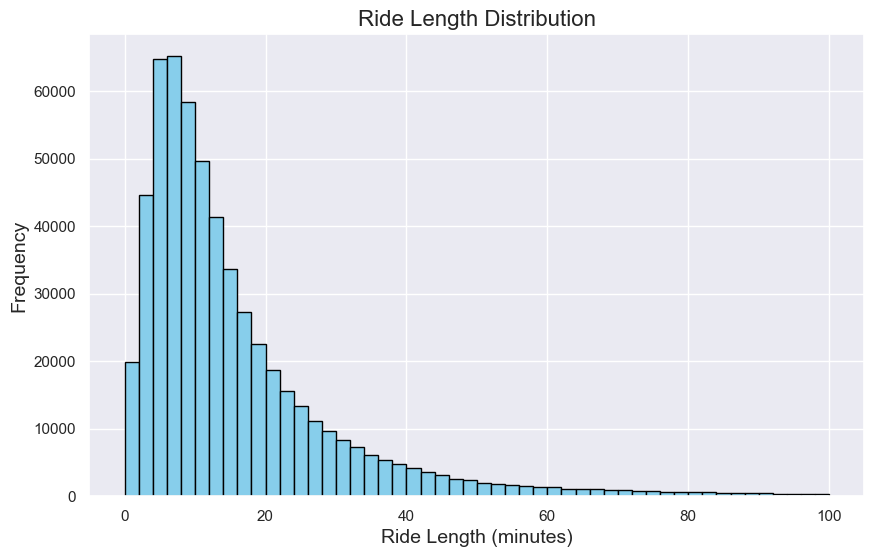

In [53]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(divvy['ride_length(mins)'], bins=50, range=(0, 100), color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Ride Length (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Ride Length Distribution', fontsize=16)

# Show the plot
plt.show()

The highest ride length by bikers is between 6 - 10 minutes while very few bike more than 40 minutes.

<strong>5. What is the most frequent Ride start time? </strong>

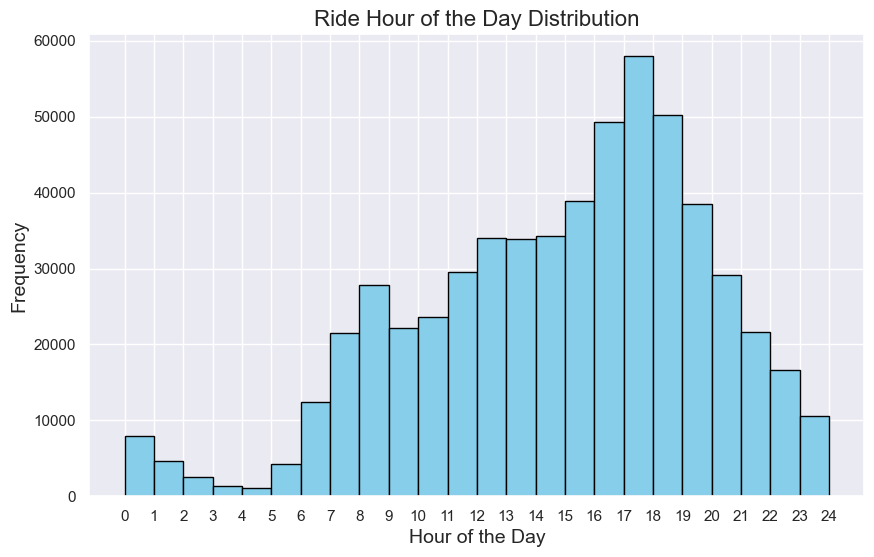

In [65]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(divvy['started_hour'], bins=24, range=(0, 24), color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Ride Hour of the Day Distribution', fontsize=16)

# Set x-axis ticks to show all hours from 0 to 24
plt.xticks(range(25))
# Show the plot
plt.show()

The most frequent ride hour of the day is between 4pm - 7 pm.

<strong> 6. What is the most frequent ride weekday? </strong>

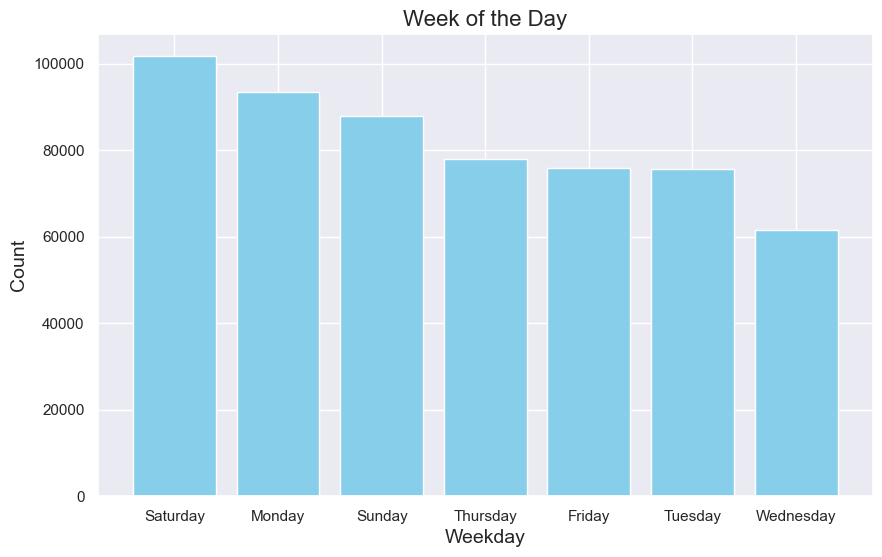

In [71]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(divvy['weekday'].value_counts().index, divvy['weekday'].value_counts().values, color='skyblue')

# Adding labels and title
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Week of the Day', fontsize=16)
plt.show()

Saturday is the highest bike day in the weekdays among bikers.

<strong>7. Heatmap correlation between Time of the day vs Day of the Week between bikers.</strong>

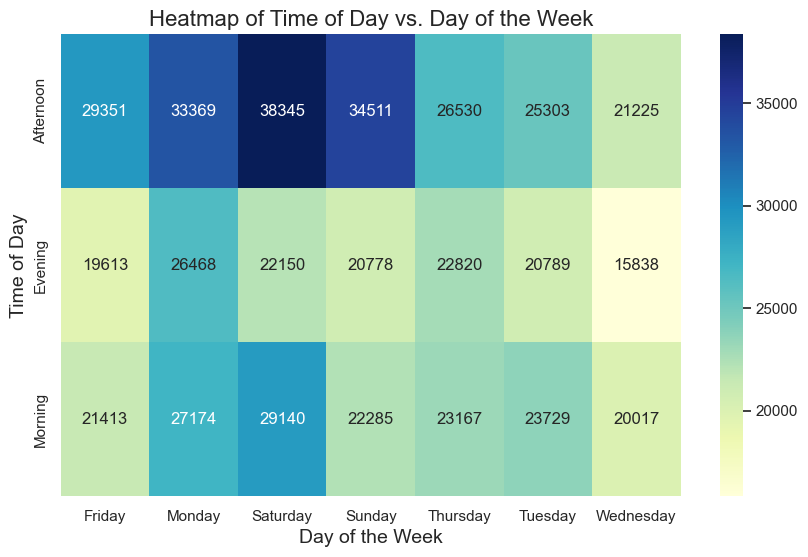

In [79]:
# Create a contingency table
filtered = divvy[divvy['time_of_day'] != 'Unknown']
contingency_table = pd.crosstab(filtered['time_of_day'], filtered['weekday'])

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")

# Adding labels and title
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Time of Day', fontsize=14)
plt.title('Heatmap of Time of Day vs. Day of the Week', fontsize=16)

# Show the plot
plt.show()

The most frequent bike time is Saturday Afternoon while the least frequent ride time is Wednesday Evening.

## Ready to share your work?

Click "Share" in the upper right corner, copy the link, and share it! You can also add this workspace to your DataCamp Portfolio